In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import xarray as xr

In [2]:
# Define Directories
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Publish/Storm_Tracking/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Publish/Figures/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Dataset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Dataset+'_Output.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Dataset+'_Output.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time, Birth_Month = [], [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
        Birth_Month.append(Find_Month(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    ET_DF["Genesis Month"] = Birth_Month
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
# Edit Time Format
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Find Month
def Find_Month(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
        Month = New_Time.month
    except:
        Month = numpy.nan
    return (Month)

In [7]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)

In [8]:
# Number of Years For Each Climate Scenario
Num_Years = numpy.array([90,93,93])

In [9]:
# Open Dataset A Files
Control_Data_A, Control_ET_A, Control_Codes = Files_Open("Control", Diri, 'DatasetA')
RCP45_Data_A, RCP45_ET_A, RCP45_Codes = Files_Open("RCP45", Diri, 'DatasetA')
RCP85_Data_A, RCP85_ET_A, RCP85_Codes = Files_Open("RCP85", Diri, 'DatasetA')

In [10]:
# Open Subset B Files
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, 'SubsetB')
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, 'SubsetB')
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, 'SubsetB')

In [11]:
# Create Function to Plot Monthly Frequency Histograms
def ET_Month_Histogram(Control_ET, RCP45_ET, RCP85_ET, Var, Var_Label, Title, Rela, Orient, Bins, \
    Dens_Min, Dens_Max, Dens_Width, Savefig, Figname):
    Fig = pyplot.figure(figsize=(12,8))
    Colours = ['limegreen', 'orange', 'red']
    Labels = ["Control", "RCP4.5", "RCP8.5"]
#
# Plot Month
    Axis = Fig.add_subplot(1,1,1)
    if Var == "Genesis Month":
        pyplot.hist([Control_ET[Var], RCP45_ET[Var], RCP85_ET[Var]], density=Rela, \
        orientation=Orient, bins=Bins, color=Colours, label=Labels)
    ET_Histo_Month_Formatting(Var, Var_Label, Rela, Orient, Dens_Min, Dens_Max, Dens_Width, Title)
#
# Legend
    pyplot.legend(loc=2, fontsize=15)
#
# Save Fig
    Fig.tight_layout()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [12]:
# Formatting Based on Variable
def ET_Histo_Month_Formatting(Var, Var_Label, Rela, Orient, Dens_Min, Dens_Max, Dens_Width, Title):
# Ticks and Lims
    if Orient == 'vertical':
        pyplot.xticks(Create_Bins(1,12,1))
        pyplot.xlim(0.5,12.5)
        pyplot.yticks(Create_Bins(Dens_Min, Dens_Max, Dens_Width))
        pyplot.ylim(Dens_Min, Dens_Max)
#
# Labels and Title
    if Rela == True:
        x_Label = "Proportion"
    else:
        x_Label = "Frequency"
    pyplot.ylabel(x_Label, fontsize=18)
    pyplot.xlabel(Var_Label, fontsize=18)
    pyplot.title(Title, fontsize=25)
#
# Gridlines
    pyplot.grid(linewidth=0.3, color='silver', linestyle='-')

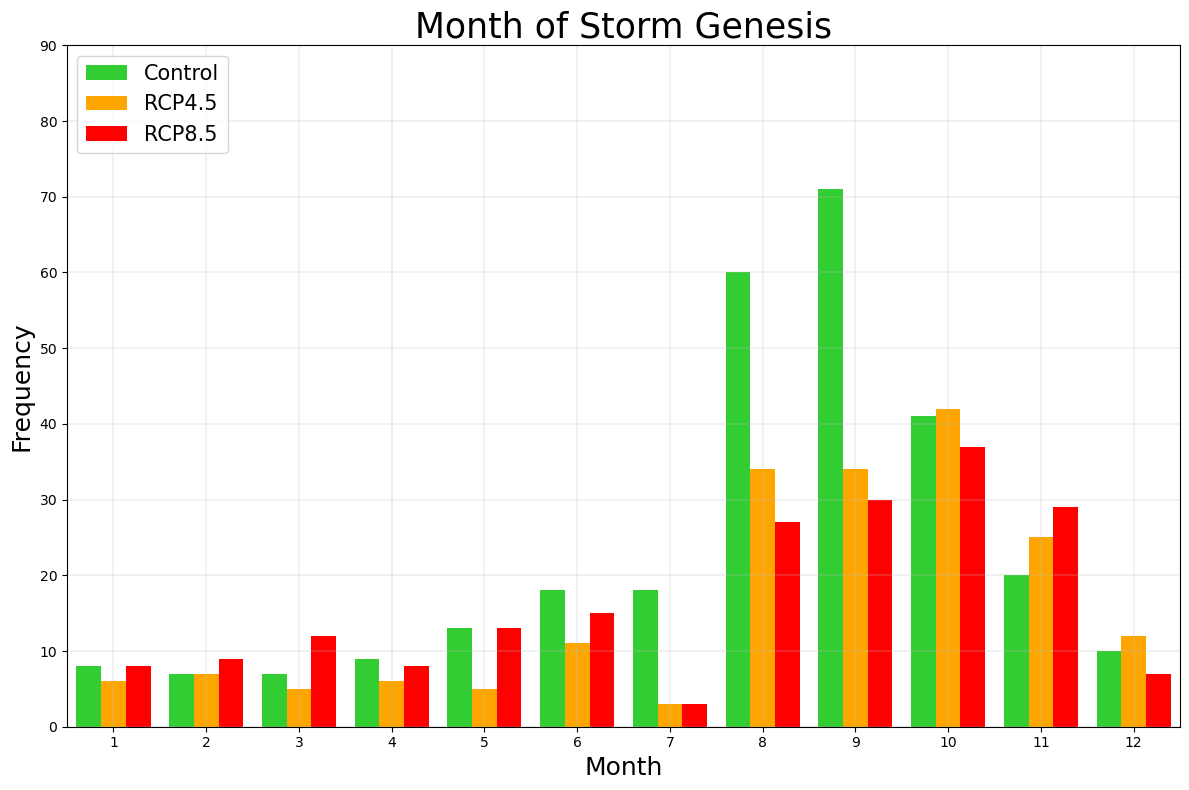

In [13]:
# Figure B.2
# Plot Monthly Frequency Histogram
Var = "Genesis Month"
Var_Label = "Month"
Title = "Month of Storm Genesis"
Rela = False
Orient = 'vertical'
Bins = Create_Bins(0.5,12.5,1)
Dens_Min, Dens_Max, Dens_Width = 0, 90, 10
Savefig = True
Figname = 'Figure_B.2.png'
ET_Month_Histogram(Control_ET, RCP45_ET, RCP85_ET, Var, Var_Label, Title, Rela, Orient, Bins, \
Dens_Min, Dens_Max, Dens_Width, Savefig, Figname)

In [14]:
# Count Storms Based on Genesis Month
def Count_Months(ET_DF):
    Month_Count = numpy.zeros(13)
    for i in range(12):
        Month_Count[i] = len(ET_DF[ET_DF["Genesis Month"] == i+1])
    Month_Count[12] = len(ET_DF)
    return (Month_Count)

In [15]:
# Function to Round to n Decimal Places
def Rounding(Array, n):
    Array_Rounded = numpy.zeros(len(Array))
    for i in range(len(Array)):
        Array_Rounded[i] = round(Array[i], n)
    return (Array_Rounded)

In [16]:
# Create DataFrame to Store Months Data
def Months_DF(Control_ET_A, RCP45_ET_A, RCP85_ET_A, Control_ET, RCP45_ET, RCP85_ET):
    Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total']
#
# Use Function to Count Number of Storm Genesis in Each Month For Dataset A (Overall Storm Count)
    Control_ET_A_Months = Count_Months(Control_ET_A) / 90 * 100
    RCP45_ET_A_Months = Count_Months(RCP45_ET_A) / 93 * 100
    RCP85_ET_A_Months = Count_Months(RCP85_ET_A) / 93 * 100
# Observed Climatology of All North Atlantic TCs
    Climo_A_Months = numpy.array([6,1,1,3,32,113,145,439,709,431,122,24,2026]) / 172 * 100
#
# Use Function to Count Number of Storm Genesiss in Each Month For Subset B (ET Complete Cases)
    Control_ET_B_Months = Count_Months(Control_ET) / 90 * 100
    RCP45_ET_B_Months = Count_Months(RCP45_ET) / 93 * 100
    RCP85_ET_B_Months = Count_Months(RCP85_ET) / 93 * 100
#
# Calculate Percentage of ET Complete
    Control_ET_Percent = Control_ET_B_Months / Control_ET_A_Months
    RCP45_ET_Percent = RCP45_ET_B_Months / RCP45_ET_A_Months
    RCP85_ET_Percent = RCP85_ET_B_Months / RCP85_ET_A_Months
#
# Round to Three Decimal Places
    Control_ET_A_Months = Rounding(Control_ET_A_Months, 1)
    RCP45_ET_A_Months = Rounding(RCP45_ET_A_Months, 1)
    RCP85_ET_A_Months = Rounding(RCP85_ET_A_Months, 1)
    Climo_A_Months = Rounding(Climo_A_Months, 1)
    Control_ET_B_Months = Rounding(Control_ET_B_Months, 1)
    RCP45_ET_B_Months = Rounding(RCP45_ET_B_Months, 1)
    RCP85_ET_B_Months = Rounding(RCP85_ET_B_Months, 1)
    Control_ET_Percent = Rounding(Control_ET_Percent, 3)
    RCP45_ET_Percent = Rounding(RCP45_ET_Percent, 3)
    RCP85_ET_Percent = Rounding(RCP85_ET_Percent, 3)
#
# Create DataFrame
    DF = pandas.DataFrame({"Month": Months, "Climo Dataset A": Climo_A_Months, \
    "Control Dataset A": Control_ET_A_Months, "RCP4.5 Dataset A": RCP45_ET_A_Months, "RCP8.5 Dataset A": RCP85_ET_A_Months, \
    "Control Subset B": Control_ET_B_Months, "RCP4.5 Subset B": RCP45_ET_B_Months, "RCP8.5 Subset B": RCP85_ET_B_Months, \
    "Control ET Complete Rate": Control_ET_Percent, "RCP4.5 ET Complete Rate": RCP45_ET_Percent, \
    "RCP8.5 ET Complete Rate": RCP85_ET_Percent})
    return (DF)

In [17]:
# Table 2
# Monthly Climatological Statistics
Months_Count_DF = Months_DF(Control_ET_A, RCP45_ET_A, RCP85_ET_A, Control_ET, RCP45_ET, RCP85_ET)
Months_Count_DF

,Month,Climo Dataset A,Control Dataset A,RCP4.5 Dataset A,RCP8.5 Dataset A,Control Subset B,RCP4.5 Subset B,RCP8.5 Subset B,Control ET Complete Rate,RCP4.5 ET Complete Rate,RCP8.5 ET Complete Rate
0,Jan,3.5,28.9,19.4,22.6,8.9,6.5,8.6,0.308,0.333,0.381
1,Feb,0.6,15.6,24.7,21.5,7.8,7.5,9.7,0.500,0.304,0.450
2,Mar,0.6,27.8,19.4,28.0,7.8,5.4,12.9,0.280,0.278,0.462
3,Apr,1.7,23.3,24.7,16.1,10.0,6.5,8.6,0.429,0.261,0.533
4,May,18.6,26.7,16.1,28.0,14.4,5.4,14.0,0.542,0.333,0.500
5,Jun,65.7,37.8,16.1,23.7,20.0,11.8,16.1,0.529,0.733,0.682
6,Jul,84.3,37.8,11.8,6.5,20.0,3.2,3.2,0.529,0.273,0.500
7,Aug,255.2,140.0,73.1,60.2,66.7,36.6,29.0,0.476,0.500,0.482
8,Sep,412.2,193.3,103.2,84.9,78.9,36.6,32.3,0.408,0.354,0.380
9,Oct,250.6,106.7,93.5,59.1,45.6,45.2,39.8,0.427,0.483,0.673


In [18]:
# Calculate Statistical Significance Using Chi Square Test
def Chi_Square_Test(Vals):
    P_Val = stats.chisquare(Vals)[1]
    return (P_Val)

In [19]:
# Apply Chi Square Test For Storm Count Each Month
def Months_Count_Test(DF, Var1, Var2):
    P_Vals = numpy.zeros(len(DF))
    for i in range(len(P_Vals)):
        Vals = [DF[Var1][i], DF[Var2][i]]
        P_Vals[i] = round(Chi_Square_Test(Vals), 3)
    return (P_Vals)

In [20]:
# Calculate Statistical Significance Using Z Test
def Z_Test(Vals_A, Vals_B):
    P_Val = proportions_ztest(Vals_B, Vals_A)[1]
    return (P_Val)

In [21]:
# Apply Z Test For ET Complete Percentages Each Month
def Months_Prop_Test(DF, VarA1, VarA2, VarB1, VarB2):
    P_Vals = numpy.zeros(len(DF))
    for i in range(len(P_Vals)):
        Vals_A = [DF[VarA1][i], DF[VarA2][i]]
        Vals_B = [DF[VarB1][i], DF[VarB2][i]]
        P_Vals[i] = round(Z_Test(Vals_A, Vals_B), 3)
    return (P_Vals)

In [24]:
# Calculate Statistical Significance of Monthly Statistics
def Months_Signif_Test(DF):
    Months_Count_DF = DF.copy()
    Months_Count_DF["P Values Climo A"] = Months_Count_Test(DF, "Control Dataset A", "Climo Dataset A")
    Months_Count_DF["P Values RCP4.5 A"] = Months_Count_Test(DF, "Control Dataset A", "RCP4.5 Dataset A")
    Months_Count_DF["P Values RCP8.5 A"] = Months_Count_Test(DF, "Control Dataset A", "RCP8.5 Dataset A")
    Months_Count_DF["P Values RCP4.5 B"] = Months_Count_Test(DF, "Control Subset B", "RCP4.5 Subset B")
    Months_Count_DF["P Values RCP8.5 B"] = Months_Count_Test(DF, "Control Subset B", "RCP8.5 Subset B")
    Months_Count_DF["P Values RCP4.5 Rate"] = Months_Prop_Test(DF, "Control Dataset A", "RCP4.5 Dataset A", "Control Subset B", "RCP4.5 Subset B")
    Months_Count_DF["P Values RCP8.5 Rate"] = Months_Prop_Test(DF, "Control Dataset A", "RCP8.5 Dataset A", "Control Subset B", "RCP8.5 Subset B")
    return (Months_Count_DF)

In [25]:
# Table A.1
# Statistical Significances of Monthly Climatological Statistics
Months_Count_Signif = Months_Signif_Test(Months_Count_DF)
Months_Count_Signif

,Month,Climo Dataset A,Control Dataset A,RCP4.5 Dataset A,RCP8.5 Dataset A,Control Subset B,RCP4.5 Subset B,RCP8.5 Subset B,Control ET Complete Rate,RCP4.5 ET Complete Rate,RCP8.5 ET Complete Rate,P Values Climo A,P Values RCP4.5 A,P Values RCP8.5 A,P Values RCP4.5 B,P Values RCP8.5 B,P Values RCP4.5 Rate,P Values RCP8.5 Rate
0,Jan,3.5,28.9,19.4,22.6,8.9,6.5,8.6,0.308,0.333,0.381,0.000,0.172,0.380,0.541,0.943,0.843,0.585
1,Feb,0.6,15.6,24.7,21.5,7.8,7.5,9.7,0.500,0.304,0.450,0.000,0.152,0.333,0.939,0.650,0.211,0.769
2,Mar,0.6,27.8,19.4,28.0,7.8,5.4,12.9,0.280,0.278,0.462,0.000,0.221,0.979,0.509,0.262,0.987,0.164
3,Apr,1.7,23.3,24.7,16.1,10.0,6.5,8.6,0.429,0.261,0.533,0.000,0.840,0.251,0.389,0.745,0.226,0.516
4,May,18.6,26.7,16.1,28.0,14.4,5.4,14.0,0.542,0.333,0.500,0.229,0.105,0.860,0.043,0.940,0.195,0.771
5,Jun,65.7,37.8,16.1,23.7,20.0,11.8,16.1,0.529,0.733,0.682,0.006,0.003,0.072,0.146,0.516,0.164,0.244
6,Jul,84.3,37.8,11.8,6.5,20.0,3.2,3.2,0.529,0.273,0.500,0.000,0.000,0.000,0.000,0.000,0.121,0.862
7,Aug,255.2,140.0,73.1,60.2,66.7,36.6,29.0,0.476,0.500,0.482,0.000,0.000,0.000,0.003,0.000,0.737,0.945
8,Sep,412.2,193.3,103.2,84.9,78.9,36.6,32.3,0.408,0.354,0.380,0.000,0.000,0.000,0.000,0.000,0.368,0.664
9,Oct,250.6,106.7,93.5,59.1,45.6,45.2,39.8,0.427,0.483,0.673,0.000,0.351,0.000,0.967,0.530,0.427,0.002


In [26]:
# Output DF to csv File
def Output_File(DF, File_Name):
    DF.to_csv(Output_Diri+File_Name)

In [27]:
# Output Monthly Climatological Statistics Table
Output_File(Months_Count_Signif, 'Table_2.csv')